## Материалы к проекту

### Дашборд в Tableau и презентация

**Ссылка на Дашборд:**

[Дашборд в Tableau] Ссылка на дашборд в Tableau: https://public.tableau.com/app/profile/valeria2892/viz/Apps_Project/Dashboard1

**Презентация:**

[Презентация в pdf] Ссылка на презентацию с основными выводами: https://drive.google.com/file/d/10YWIc4xLLoWp3t-S-gad_6Q4_xRRLGc_/view?usp=sharing

# Проект-исследование для мобильного приложения "Ненужные вещи"

## Цели и план исследования

**Клиент:** <br>

Заказчиком исследования является мобильное приложение "Ненужные вещи", в котором пользователи продают свои ненужные вещи, размещая их на доске объявлений.  <br>

**Основной метрикой, по которой компания оценивает успешность объявления является просмотр контактов**: чем больше пользователей просматривает контакты объявления, тем выше вероятность, что у вещи появится новый хозяин.  <br>

Соответственно, пользователи по обе стороны останутся довольны: одни получат деньги, третьи приобретут нужную вещь по цене ниже рыночной. То есть, плптформа будет развиваться: пользователи будут пользоваться приложением снова, а также рекомендовать его новым пользователям.

**Содержание** <br>

**1.Постановка ключевых бизнес-целей и задач проекта. Содержание исследования** <br>


**2.Подготовка к исходных данных** <br>

2.1.Верхнеуровневый анализ исходных данных: размер датасетов, поля и типы данных в них <br>
2.2.Обработка исходных данных: <br>
2.2.1.Обработка названий столбцов и типов данных (при необходимости) <br>
2.2.2.Проверка данных на дубликаты <br>
2.2.3.Проверка и обработка пропущенных значений <br>


**3.Исследовательский анализ данных** <br>

3.1.Анализ воронок событий мобильного приложения: их варианты, основные этапы и число пользователей на каждом этапе <br>
3.2.Портрет пользователей и анализ взаимодействия с платформой: источники, с которых пользователи установили приложение, количество действий и динамика посещения приложения в зависимости от даты <br>
3.3.Анализ основных действий пользователей и их влияния на совершение целевого события (просмотр контактов) <br>


**4.Проверка статистических гипотез** <br>

4.1.Проверка статистической гипотезы 1: конверсия в просмотры контактов различается у группы пользователей, совершающих действия tips_show и tips_click, от группы пользвоателей, совершающих только действие tips_show <br>
4.2.Проверка статистической гипотезы 2: просмотр контактов группы пользователей, пришедших из Yandex, значимо отличается от пользователей, пришедших из Google <br>


**5.Основные выводы** <br>

5.1.Общее описание ключевых выводов исследования <br>
5.2.Ссылка на презентацию в формате pdf <br>
5.3.Ссылка на дашборд с визуализацией результатов исследования <br>

## Верхнеуровневый анализ и подготовка исходных данных

Начнем изучение исходных данных о пользователях и их действиях, совершенных в приложении. Получим общую информацию о датасетах, основных событий и характиристиками активности посетителей.

In [1]:
#импортируем необходимые для работы библиотеки

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import os
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#импортируем датасеты

mobile_data = pd.read_csv('/datasets/mobile_dataset.csv')
sources_data = pd.read_csv('/datasets/mobile_soures.csv')

In [3]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
#пранализируем первый датасет

display(mobile_data.head())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [5]:
print('Размер датасета:',mobile_data.shape)

Размер датасета: (74197, 3)


In [6]:
#выведем число уникальных пользователей, использовавших приложение

print('Число уникальных пользователей: ',mobile_data['user.id'].nunique())

Число уникальных пользователей:  4293


In [7]:
#выведем на экран основные виды действий

display(mobile_data['event.name'].unique())

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [8]:
#проанализируем временной горизонт данных

print('Временной горизонт данных: с',mobile_data['event.time'].min(), 'по',mobile_data['event.time'].max())

Временной горизонт данных: с 2019-10-07 00:00:00.431357 по 2019-11-03 23:58:12.532487


Датасет mobile_dataset содержит более 74 тысяч записей и три колонки:

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Информация об активностях пользователей **с 7 октября 2019 по 3  ноября 2019** представлена в **16 видах действий** пользователей. Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

Видим, что в колонке с названием события event.name есть два скрытых дубликата, которые касаются целевого события - просмотра контактов. В дальнейшем это может вызвать неудобства при анализе. Также следует отметить, что номер поиска "Search%" не несет смысловой нагрузки для анализа датасета. Поэтому имеет смысл назвать эти события одинаково.

In [9]:
#объединим события в зависимости от содержания/смысла

mobile_data['event.name'].replace('contacts_show','show_contacts',inplace=True)
mobile_data['event.name'].replace('search_1','search',inplace=True)
mobile_data['event.name'].replace('search_2','search',inplace=True)
mobile_data['event.name'].replace('search_3','search',inplace=True)
mobile_data['event.name'].replace('search_4','search',inplace=True)
mobile_data['event.name'].replace('search_5','search',inplace=True)
mobile_data['event.name'].replace('search_6','search',inplace=True)
mobile_data['event.name'].replace('search_7','search',inplace=True)

#выведем на экран основные виды действий

display(mobile_data['event.name'].unique())

array(['advert_open', 'tips_show', 'map', 'show_contacts', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

In [10]:
#создадим функцию, при помощи которой будем унифицировать названия столбцов

def multiple_replace(target_str, replace_values):
    # получаем заменяемое: подставляемое из словаря в цикле
    for i, j in replace_values.items():
        # меняем все target_str на подставляемое
        target_str = target_str.replace(i, j)
    return target_str


# создаем словарь со значениями, которые будет изменять
replace_values = {'search_1': 'search','search_2': 'search','search_3': 'search','search_4': 'search','search_5': 'search','search_6': 'search','search_7': 'search',
         'contacts_show': 'show_contacts'}


mobile_data['event.name'] =  multiple_replace(mobile_data['event.name'], replace_values)

In [11]:
#проверка

display(mobile_data['event.name'].unique())

array(['advert_open', 'tips_show', 'map', 'show_contacts', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

Что касается типов данных, желательно перевести столбец с датой события в формат даты

In [12]:
#переведем столбец с датой события в формат даты

mobile_data['event.time'] = mobile_data['event.time'].astype('datetime64')

Далее перейдем к анализу датасета по источникам.

In [13]:
#выведем информацию о датасете с источниками

sources_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [14]:
#пранализируем первый датасет

display(sources_data.head())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Датасет mobile_sources содержит две колонки: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.


In [15]:
print('Размер датасета:',sources_data.shape)

Размер датасета: (4293, 2)


In [16]:
#выведем число уникальных пользователей, использовавших приложение

print('Число уникальных пользователей: ',sources_data['userId'].nunique())

Число уникальных пользователей:  4293


In [17]:
#выведем на экран основные виды действий

display(sources_data['source'].value_counts())

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

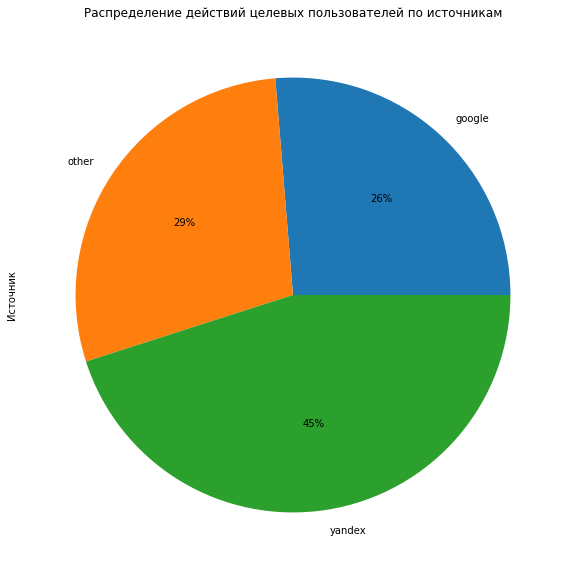

In [18]:
#проанализируем пользователей в зависимости от источника

sources_data['source'].value_counts().sort_values(ascending = True).plot(kind = 'pie', title = 'Распределение действий целевых пользователей по источникам', figsize = (10,10), autopct='%1.0f%%')
plt.ylabel('Источник')
plt.show()

Видим, что датасет по источникам содержит 4293 записи с ID пользователей и источниками их привлечения, что совпадает с количеством уникальных пользователей из первого датасета, исходя из чего мы можем предположить, что мы знаем источники привлечения по 100% пользователей и можем объединить два датасета по столбцу с ID пользователей. <br>

Всего имеем три вида источников: 

1.yandex (45% пользователей)

2.google (26%)

3.другие (29%)

In [19]:
#объединим два датасета в один

mobile_data = mobile_data.rename(columns={'user.id': 'userId'})

data_full = mobile_data.merge(sources_data)

In [20]:
display(data_full.head())

,event.time,event.name,userId,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


In [21]:
#приведем названия столбцов к нужному формату (змеиному регистру)

#data_full = data_full.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'userId': 'user_id'})
data_full.columns = [x.replace('.', '_') for x in data_full.columns]
data_full = data_full.rename(columns={'userId': 'user_id'})

In [22]:
display(data_full.head())

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


In [83]:
### КОД ТИМЛИДА
# работает со столбцами обоих датасетов

import re

#ds = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
ds = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')


ds.columns =[re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(). #эта часть переводит CamelCase в snake_case (добавляет перед заглавной буквой подчеркивание)
             replace('.', '_') #а эта заменяет точки на подчеркивания
             for x in ds.columns] 

print(ds.columns)

Index(['user_id', 'source'], dtype='object')


In [23]:
display(data_full.head())

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


Также при верхнеуровневом просмотре датасета видим, что столбец с временем события представлен в формате, который не совсем удобен для анализа и визуализации на графиках. Поэтому имеет смысл разделить данные данного столбца: выделить в отдельные колонки дату и время совершения события.

In [24]:
#добавим отдельные столбцы с датой и временем

data_full['event_time'] = pd.to_datetime(data_full['event_time'])
data_full['date'] = data_full['event_time'].dt.date
data_full['time'] = data_full['event_time'].dt.time

In [25]:
#проверка

display(data_full.head())

,event_time,event_name,user_id,source,date,time
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,00:00:00.431357
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,00:00:01.236320
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,00:00:07.039334
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,00:01:27.770232
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,00:01:34.804591


Далее проанализируем объединенный датасет на наличие пропусков и дубликатов.

In [26]:
#проверим датасет на наличие пропусков

print("Количество пропусков в датасете по столбцам")
data_full.isna().mean().sort_values(ascending = True)

Количество пропусков в датасете по столбцам


event_time    0.0
event_name    0.0
user_id       0.0
source        0.0
date          0.0
time          0.0
dtype: float64

In [27]:
#проверка количества дубликатов

data_dup = data_full.duplicated().sum()

print("Количество дубликатов в датасете:", data_dup)

Количество дубликатов в датасете: 0


**Промежуточный вывод:** <br>

Мы подготовили датасет к анализу: изучили содержание исходных данных, для удобства объединили два датасета в один. Объединенный датасет успешно прошел проверку на наличие пропусков и дубликатов. Также мы преобразовали некоторые колонки и добавили новые с датой и временем.

## Исследовательский анализ данных

В прошлом разделе мы уже провели верхнеуровневый анализ датасета: выяснили, что период с 7 октября 2019 по 3 ноября 2019 приложение "Ненужные вещи" посетили 4293 пользователей, которые совершали 16 видов действий пользователей. Подавляющее число пользователей пришло к нам в приложение  из yandex (45% пользователей). На google пришлось 26%, а на остальные источники - 29%.

Теперь проанализируем основные действия пользователей и создадим базу для будущей воронки событий до совершения целевого действия - просмотра контактов

Следует отметить, что не все пользователи, заходившие в приложения, помогут нам с ерешением нашей задачи: кто-то мог попасть в приложение случайно, кто-то просто зашел посмотреть без цели что-то приобрести. Поэтому из общей выборки выделим тех пользователей, которые хотя бы раз совершили целевое действие - просмотр контактов. Далее по ним проанализируем варианты "маршрутизации" клиента до целевого действия. 

### Анализ активности пользователей и взаимосвязи между их действиями

Проведем верхнеуровневый анализ пользователей нашего приложения и их активности.

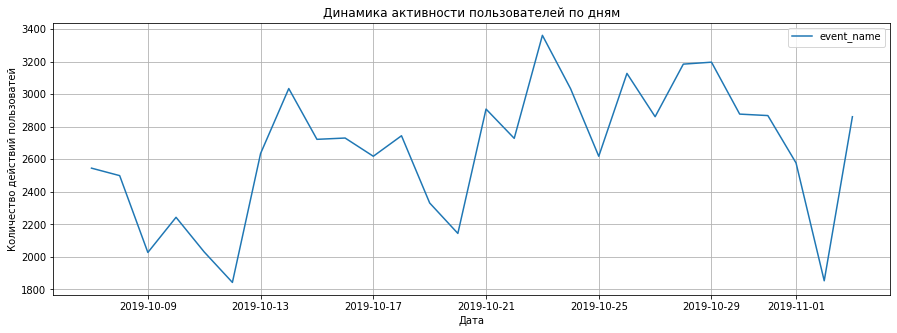

In [28]:
#построим диаграмму по количеству действий пользвателей в зависимости от даты

data_full.groupby('date').agg({'event_name': 'count'}).plot(kind = 'line', title = 'Динамика активности пользователей по дням', figsize=(15, 5), grid = True)
plt.ylabel('Количество действий пользоватей')
plt.xlabel('Дата')
plt.show()

In [29]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   date        74197 non-null  object        
 5   time        74197 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.0+ MB


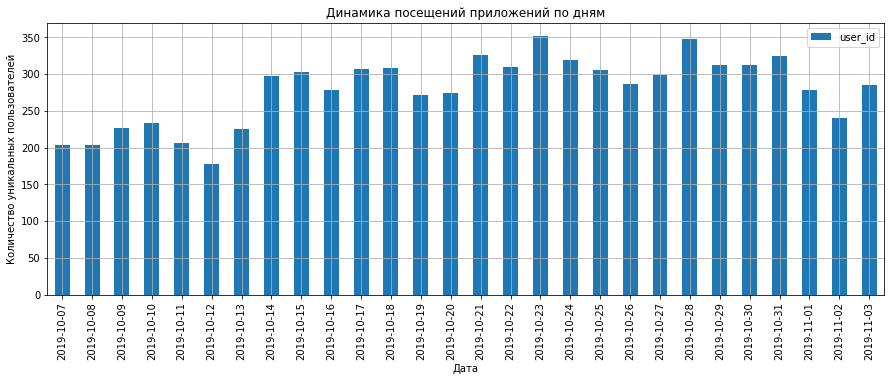

In [30]:
#построим диаграмму по количеству уникальных пользвателей в зависимости от даты

data_full.groupby('date').agg({'user_id': 'nunique'}).plot(kind = 'bar', title = 'Динамика посещений приложений по дням', figsize = (15,5), grid = True)
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Дата')
plt.show()

Судя по графикам выше, можем сделать вывод о том, что аудитория приложения постепенно растет: число пользователей на конец периода (03.11.2019) увеличилось на 39,7% по сравнению с началом отчетного периода. 23 октября в приложении наблюдался пик посещения - в этот день его посетили 352 пользователя, а наиболее существенный спад - 12 октября (178 посетителей).

Что касается действий пользователей, видим, что они были подвержены значительным колебаниям в течение всего периода, причем как в конце, так и в начале наблюдения, причем, пики и спады не всегда совпадают с динамикой числа уникальных пользователей. Чтобы нивелировать влияние изменения числа пользователей, имеет смысл проаанлизировать динамику числа действий на одного пользователя

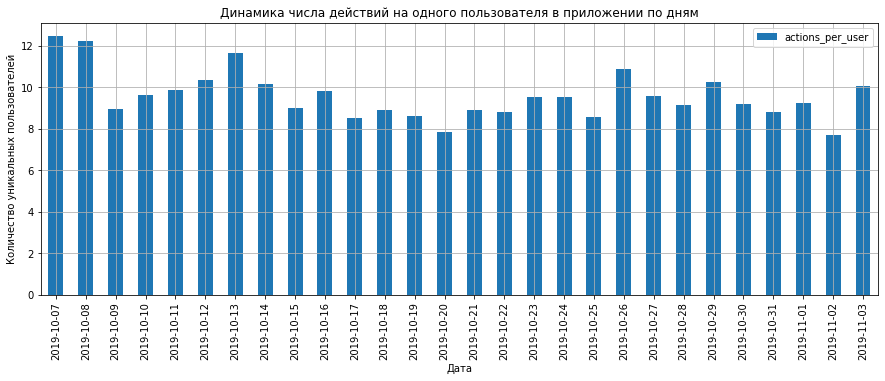

In [31]:
#рассчитаем динамику среднего количества действий на пользователя

data_date = data_full.groupby('date').agg({'user_id': 'nunique'}).reset_index()
data_date_2 = data_full.groupby('date').agg({'event_name': 'count'}).reset_index()
period_activity = data_date.merge(data_date_2)
period_activity['actions_per_user'] = period_activity['event_name']/period_activity['user_id']

#построим график распределения количесвта действий на одного пользователя 

period_activity.groupby('date').agg({'actions_per_user': 'mean'}).plot(kind = 'bar', title = 'Динамика числа действий на одного пользователя в приложении по дням', figsize = (15,5), grid = True)
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Дата')
plt.show()

Что касается количества действий на одного пользователя, видим, что число действий, которые приходилось совершать пользователям в начале отчетного периода было больше: позже эта динамика сократилась, что может быть связано с тем, что пользователи, которые ужен заходили в приложение, стали быстрее находить нужные им объявления.

С другой стороны, снижение количества действий пользователей, с логической точки зрения, могло бы свидетельствовать о снижении интереса к приложению, но на данном этапе мы считаем, что это не так, так как аудитория приложения, в целом, растет.

**Промежуточный вывод:** таким образом, исходя из анализа исходных данных, можем сделать выводы о том, что аудитория приложения растет. Также следует отметить, что на конец отчетного периода пользователи, в среднем, стали совершать на 15-20% меньше действий, чем в начале отчетного периода, что, возможно, может говорить об адаптации к приложении и росту эффективности его  использования - клиенты легче находят то, что им нужно. Ниже мы это проверим, изучив количество клиентов, псовершающих целевое действие - просмотр контактов.

### Анализ целевых пользователей, которые хотя бы раз просматривали контакты

In [32]:
#выделим пользователей, которые хотя бы раз совершили целевое действие

key_users = data_full.query('event_name == "show_contacts"')

#выведем число уникальных пользователей из ключевой выборки

print('Число уникальных пользователей, просматривавших контакты: ', key_users['user_id'].nunique())

Число уникальных пользователей, просматривавших контакты:  981


Таким образом, в нашу целевую выборку попал **981 пользователь или 23% (т.е. практически каждый пятый или четвертый посетитель приложения)**. Статистика и действия именно по этим пользователям нас интересует. Рассмотрим варианты воронок событий по данным пользователям.

In [33]:
#создадим список по пользователям, совершившим целевое событие

target_users = key_users['user_id']

In [34]:
#создадим датасет, в котором будет информация только по пользователям, совершившим целевое событие

target_data = data_full[data_full['user_id'].isin(target_users)]

In [35]:
#выведем на экран размер нового датасета

target_data.shape

(27197, 6)

In [36]:
print('Проверка уникальных пользователей, просматривавших контакты: ', target_data['user_id'].nunique())

Проверка уникальных пользователей, просматривавших контакты:  981


**Промежуточный вывод:** в целевой датасет попал 981 пользователь, который хотя бы раз совершил целевое действие: видим, что размер датасета для анализа сократился почти в 3 раза. Т.е. в среднем каждый из этих пользователей совершает около больше 25 действий.

**Ответим на один из вопросов ТЗ: какие действия чаще всего совершают пользователи, которые просматривают контакты** и сравним их с остальными пользователями.

In [37]:
#выделим пользователей, которые ни разу не совершили совершили целевое действие

beyond_target = data_full[-data_full['user_id'].isin(target_users)]

print('Проверка уникальных пользователей, ни разу не просмотревших контакты: ', beyond_target['user_id'].nunique())

Проверка уникальных пользователей, ни разу не просмотревших контакты:  3312


In [38]:
#проанализируем события в воронке с целевыми пользователями по частоте совершения

target_data['event_name'].value_counts().sort_values(ascending=False)

tips_show        12768
show_contacts     4529
photos_show       3828
search            2084
advert_open       1589
map               1101
contacts_call      541
favorites_add      424
tips_click         333
Name: event_name, dtype: int64

In [39]:
#проанализируем события в воронке с не целевыми пользователями по частоте совершения

beyond_target['event_name'].value_counts().sort_values(ascending=False)

tips_show        27287
photos_show       6184
search            4700
advert_open       4575
map               2780
favorites_add      993
tips_click         481
Name: event_name, dtype: int64

In [40]:
#проанализируем события в воронке общей выборки по частоте совершения

data_full['event_name'].value_counts().sort_values(ascending=False)

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
show_contacts     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

In [41]:
#проанализируем число уникальных целевых пользователей на каждом событии 
actions_t = target_data.groupby('event_name').agg({'user_id':'nunique'}).reset_index()
display(actions_t)

,event_name,user_id
0,advert_open,138
1,contacts_call,213
2,favorites_add,136
3,map,289
4,photos_show,339
5,search,377
6,show_contacts,981
7,tips_click,100
8,tips_show,516


In [42]:
actions_n = beyond_target.groupby('event_name').agg({'user_id':'nunique'}).reset_index()

#скорректируем число пользователей - разделим на 3.4, чтобы получить равноценную выборку целевой 
actions_n['number_corrected'] = round(actions_n['user_id']/(beyond_target['user_id'].nunique()/target_data['user_id'].nunique()),2)
display(actions_n)

,event_name,user_id,number_corrected
0,advert_open,613,181.57
1,favorites_add,215,63.68
2,map,1167,345.66
3,photos_show,756,223.92
4,search,1289,381.80
5,tips_click,222,65.76
6,tips_show,2285,676.81


Видим, что в выборке с пользователями, сделавшими хотя бы одно целевое действие, просмотр контактов занимает второе место среди наиболее часто совершаемых действий, в то время как во всей выборке оно опускается на четвертое место после показа рекомедованного объявления, просмотра фотографий и открытия карточки объявления. Это может говорить о том, что пользователи, склонные к совершению целевого действия, приходят в приложения с конкретной целью и готовы приобрести товар без дополнительного просмотра фото и рекламы.

**Промежуточный вывод:**

Также при сравнении пользователей из целевой выборки, который хотя бы раз просмотрели контакты, и выборкой пользователей, ни разу этого не сделавших, можно отметить следующие отличия:

1.Нецелевые пользователи гораздо чаще открывают карту объявлений (действие map) - в среднем, на 16% чаще

2.Целевые пользователи вдвое чаще добавляют объявление в избранное и в полтора раза чаще просматривают фотографии и кликают по рекомендованному объявлению

3.Целевые пользователи реже открывают рекламную карточку объявления (advert_open)

In [43]:
#возьмем случайного пользователя и проанализируем его путь до совершения целевого действия

display(target_data.query('user_id == "2af01902-f02a-46f7-a2c8-e46802662f8c"'))

,event_time,event_name,user_id,source,date,time
3852,2019-10-07 17:34:42.441701,show_contacts,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:34:42.441701
3853,2019-10-07 17:37:11.860102,show_contacts,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:37:11.860102
3854,2019-10-07 17:42:31.554948,photos_show,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:42:31.554948
3855,2019-10-07 17:44:33.507044,show_contacts,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:44:33.507044
3856,2019-10-07 17:44:35.701087,contacts_call,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:44:35.701087
3857,2019-10-07 17:46:25.301906,photos_show,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:46:25.301906
3858,2019-10-07 17:51:59.441243,photos_show,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:51:59.441243
3859,2019-10-07 17:52:14.537790,show_contacts,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:52:14.537790
3860,2019-10-07 17:54:08.161577,show_contacts,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:54:08.161577
3861,2019-10-07 17:55:32.706823,show_contacts,2af01902-f02a-46f7-a2c8-e46802662f8c,yandex,2019-10-07,17:55:32.706823


На примере пользователя выше видим, что сессия пользователя в приложении началась с просмотра контактов. Скорее всего, пользователь перешел по ссылке, которую получил от другого пользователя, который нашел объявление.



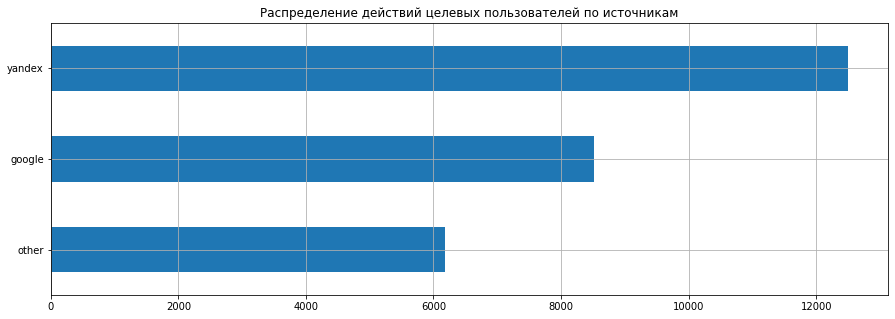

In [44]:
#проанализируем целевых пользователей в зависимости от источника

target_data['source'].value_counts().sort_values(ascending = True).plot(kind = 'barh', title = 'Распределение действий целевых пользователей по источникам', figsize = (15,5), grid = True)
plt.show()

Видим, что, с точки зрения источников, ситуация схожа с общей по выборке: наибольшее количество действий совершают целевые пользователи, перешедшие в приложение из Яндекса, на втором месте - Google.

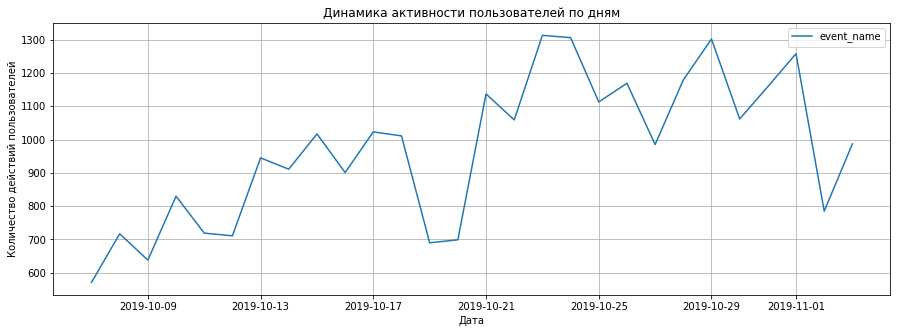

In [45]:
#построим диаграмму по количеству действий пользвателей в зависимости от даты

target_data.groupby('date').agg({'event_name': 'count'}).plot(kind = 'line', title = 'Динамика активности пользователей по дням', figsize=(15, 5), grid = True)
plt.ylabel('Количество действий пользователей')
plt.xlabel('Дата')
plt.show()

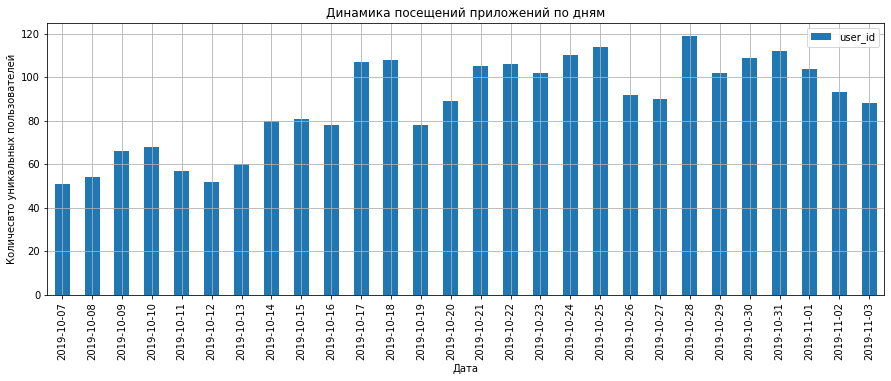

In [46]:
#построим диаграмму по количеству уникальных пользвателей в зависимости от даты

target_data.groupby('date').agg({'user_id': 'nunique'}).plot(kind = 'bar', title = 'Динамика посещений приложений по дням', figsize = (15,5), grid = True)
plt.ylabel('Количесвто уникальных пользователей')
plt.xlabel('Дата')
plt.show()

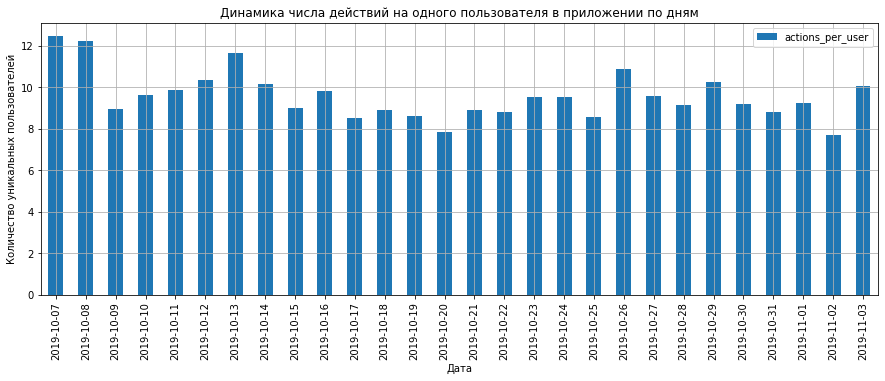

In [47]:
#рассчитаем динамику среднего количества действий на пользователя

target_date = target_data.groupby('date').agg({'user_id': 'nunique'}).reset_index()
target_date_2 = target_data.groupby('date').agg({'event_name': 'count'}).reset_index()
period_activity_t = target_date.merge(data_date_2)
period_activity_t['actions_per_user'] = period_activity_t['event_name']/period_activity['user_id']

#построим график распределения количесвта действий на одного пользователя 

period_activity_t.groupby('date').agg({'actions_per_user': 'mean'}).plot(kind = 'bar', title = 'Динамика числа действий на одного пользователя в приложении по дням', figsize = (15,5), grid = True)
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Дата')
plt.show()

Видим, что динамика пользователей и их действий незначительно отличается от общей ситуации по датасету, но показало немного лучшую динамику: число пользователей, просматривающих контакты, выросло к концу отетного периода на 72%. Также отметим, что число действий пользователей, просматривающих контакты, также незначительно отличается от среднего числа по датасету (несмотря на то, что доля данных пользователей - менее 25%)

С логической точки зрения, верно было бы анализировать активность пользователей по сессиям, но, к сожалению, аналитическая система нашей компании не содержит данных о завершении одной сессии и начале другой. Поэтому для аналитических целей будем считать, что в один и тот же день пользователь заходит в приложение с одной целью, поэтому такую активность мы будем считать сессией.

Далее имеет смысл разделить активность пользователей на сессии: сгруппируем датасет по пользователям и дням

Для того, чтобы разделить сессии между собой в пределах одного дня, будем считать, что если между событиями прошло больше 15 минут, то это разные сессии.

In [48]:
#отсортируем действия пользователей таким образом, чтобы они шли друг за другом по времени и по каждому пользователю

sessions_detailed = target_data.sort_values(by = ['user_id', 'time'])
display(sessions_detailed.head(10))

,event_time,event_name,user_id,source,date,time
43016,2019-10-30 07:50:45.948358,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:50:45.948358
43017,2019-10-30 07:53:12.730053,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:53:12.730053
43018,2019-10-30 07:54:25.826815,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:54:25.826815
43019,2019-10-30 07:55:09.436282,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:55:09.436282
43020,2019-10-30 07:57:00.426097,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:57:00.426097
43021,2019-10-30 07:58:04.614017,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:58:04.614017
43022,2019-10-30 07:58:11.976258,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:58:11.976258
43023,2019-10-30 07:59:26.486403,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:59:26.486403
43024,2019-10-30 08:01:05.420773,show_contacts,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,08:01:05.420773
43025,2019-10-30 08:02:14.126151,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,08:02:14.126151


Видим, что данные отсортированы верно: сначала идет сортировка по ID пользователя, потом по  времени действия (от самого раннего до самого позднего). Теперь разделим эту активность на сессии, присвоив каждой сессии свой индивидуальный номер.

In [49]:
sessions_detailed.head()

,event_time,event_name,user_id,source,date,time
43016,2019-10-30 07:50:45.948358,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:50:45.948358
43017,2019-10-30 07:53:12.730053,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:53:12.730053
43018,2019-10-30 07:54:25.826815,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:54:25.826815
43019,2019-10-30 07:55:09.436282,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:55:09.436282
43020,2019-10-30 07:57:00.426097,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:57:00.426097


In [50]:
#добавис колонку с разницей между предыдущим дейсствием
 
sessions_detailed['period'] = sessions_detailed.groupby('user_id')['event_time'].diff(1) #.astype('timedelta64[s]')
display(sessions_detailed.head(10))


#sessions_detailed['time'] = pd.to_datetime(sessions_detailed['time'], format='%H:%M:%S', errors='coerce').dt.time
#sessions_detailed['event_time'] = sessions_detailed['event_time'].dt.datetime
#sessions_detailed['event_time'] = pd.to_datetime(sessions_detailed['event_time'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
#sessions_detailed['period'] = sessions_detailed.groupby('user_id', 'date')['event_time'].diff(1) #.astype('timedelta64[s]')

,event_time,event_name,user_id,source,date,time,period
43016,2019-10-30 07:50:45.948358,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:50:45.948358,NaT
43017,2019-10-30 07:53:12.730053,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:53:12.730053,0 days 00:02:26.781695
43018,2019-10-30 07:54:25.826815,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:54:25.826815,0 days 00:01:13.096762
43019,2019-10-30 07:55:09.436282,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:55:09.436282,0 days 00:00:43.609467
43020,2019-10-30 07:57:00.426097,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:57:00.426097,0 days 00:01:50.989815
43021,2019-10-30 07:58:04.614017,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:58:04.614017,0 days 00:01:04.187920
43022,2019-10-30 07:58:11.976258,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:58:11.976258,0 days 00:00:07.362241
43023,2019-10-30 07:59:26.486403,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:59:26.486403,0 days 00:01:14.510145
43024,2019-10-30 08:01:05.420773,show_contacts,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,08:01:05.420773,0 days 00:01:38.934370
43025,2019-10-30 08:02:14.126151,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,08:02:14.126151,0 days 00:01:08.705378


In [51]:
#переведем период в секунды

sessions_detailed['period'] = sessions_detailed['period'].astype('timedelta64[s]')

In [52]:
#проверка
display(sessions_detailed.head(10))

,event_time,event_name,user_id,source,date,time,period
43016,2019-10-30 07:50:45.948358,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:50:45.948358,NaN
43017,2019-10-30 07:53:12.730053,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:53:12.730053,146.0
43018,2019-10-30 07:54:25.826815,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:54:25.826815,73.0
43019,2019-10-30 07:55:09.436282,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:55:09.436282,43.0
43020,2019-10-30 07:57:00.426097,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:57:00.426097,110.0
43021,2019-10-30 07:58:04.614017,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:58:04.614017,64.0
43022,2019-10-30 07:58:11.976258,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:58:11.976258,7.0
43023,2019-10-30 07:59:26.486403,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:59:26.486403,74.0
43024,2019-10-30 08:01:05.420773,show_contacts,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,08:01:05.420773,98.0
43025,2019-10-30 08:02:14.126151,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,08:02:14.126151,68.0


In [53]:
sessions_detailed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27197 entries, 43016 to 18813
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  27197 non-null  datetime64[ns]
 1   event_name  27197 non-null  object        
 2   user_id     27197 non-null  object        
 3   source      27197 non-null  object        
 4   date        27197 non-null  object        
 5   time        27197 non-null  object        
 6   period      26216 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.7+ MB


In [54]:
session_test = sessions_detailed

#convert to datetimes
session_test['event_time'] = pd.to_datetime(session_test['event_time'])
#identify difference 15Min for each group with cumulative sum
g = (session_test.groupby('user_id')['event_time'].diff() > pd.Timedelta('15Min')).cumsum()
#create counter of groups
session_test['session_id'] = session_test.groupby(['user_id', g], sort=False).ngroup() + 1
session_test['count'] = 1

display(session_test.head())

,event_time,event_name,user_id,source,date,time,period,session_id,count
43016,2019-10-30 07:50:45.948358,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:50:45.948358,NaN,1,1
43017,2019-10-30 07:53:12.730053,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:53:12.730053,146.0,1,1
43018,2019-10-30 07:54:25.826815,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:54:25.826815,73.0,1,1
43019,2019-10-30 07:55:09.436282,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:55:09.436282,43.0,1,1
43020,2019-10-30 07:57:00.426097,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-30,07:57:00.426097,110.0,1,1


Итого выше мы получили датасет с агрегацией по сессиям

In [55]:
session = target_data.groupby(['user_id', 'date', 'source'])['time'].agg('max').reset_index()
display(session.head(5))

,user_id,date,source,time
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,yandex,21:59:54.637098
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,yandex,20:05:36.234073
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-24,yandex,10:57:12.675110
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-29,yandex,22:10:25.712840
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-30,yandex,08:26:53.933176


In [56]:
target_data['target_action'] = target_data['event_name'].map({'show_contacts': '1'})
target_data['target_action'] = target_data['target_action'].fillna(0).astype(int)

In [57]:
display(target_data.head())

,event_time,event_name,user_id,source,date,time,target_action
121,2019-10-07 00:02:07.374346,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:02:07.374346,0
122,2019-10-07 00:05:16.003328,show_contacts,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:05:16.003328,1
123,2019-10-07 00:06:01.349291,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:06:01.349291,0
124,2019-10-07 00:06:56.367054,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:06:56.367054,0
125,2019-10-07 00:09:24.585200,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:09:24.585200,0


In [58]:
print(target_data['event_name'].unique())

['tips_show' 'show_contacts' 'tips_click' 'search' 'map' 'advert_open'
 'photos_show' 'favorites_add' 'contacts_call']


In [59]:
#добавим в код отметку об остальных действиях

#для tips_show
target_data['tips_show'] = target_data['event_name'].map({'tips_show': '1'})
target_data['tips_show'] = target_data['tips_show'].fillna(0).astype(int)

#для tips_click
target_data['tips_click'] = target_data['event_name'].map({'tips_click': '1'})
target_data['tips_click'] = target_data['tips_click'].fillna(0).astype(int)

#для search
target_data['search'] = target_data['event_name'].map({'search': '1'})
target_data['search'] = target_data['search'].fillna(0).astype(int)

#для map
target_data['map'] = target_data['event_name'].map({'map': '1'})
target_data['map'] = target_data['map'].fillna(0).astype(int)

#для advert_open
target_data['advert_open'] = target_data['event_name'].map({'advert_open': '1'})
target_data['advert_open'] = target_data['advert_open'].fillna(0).astype(int)

#для photos_show
target_data['photos_show'] = target_data['event_name'].map({'photos_show': '1'})
target_data['photos_show'] = target_data['photos_show'].fillna(0).astype(int)

#для favorites_add
target_data['favorites_add'] = target_data['event_name'].map({'favorites_add': '1'})
target_data['favorites_add'] = target_data['favorites_add'].fillna(0).astype(int)

#для contacts_call
target_data['contacts_call'] = target_data['event_name'].map({'contacts_call': '1'})
target_data['contacts_call'] = target_data['contacts_call'].fillna(0).astype(int)

In [ ]:
### КОД ТИМЛИДА

for event in target_data['event_name'].unique():
    target_data[event] = target_data['event_name'].map({event: '1'})
    target_data[event] = target_data[event].fillna(0).astype(int)

In [60]:
display(target_data.head())

,event_time,event_name,user_id,source,date,time,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
121,2019-10-07 00:02:07.374346,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:02:07.374346,0,1,0,0,0,0,0,0,0
122,2019-10-07 00:05:16.003328,show_contacts,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:05:16.003328,1,0,0,0,0,0,0,0,0
123,2019-10-07 00:06:01.349291,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:06:01.349291,0,1,0,0,0,0,0,0,0
124,2019-10-07 00:06:56.367054,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:06:56.367054,0,1,0,0,0,0,0,0,0
125,2019-10-07 00:09:24.585200,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,2019-10-07,00:09:24.585200,0,1,0,0,0,0,0,0,0


In [61]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27197 entries, 121 to 74191
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_time     27197 non-null  datetime64[ns]
 1   event_name     27197 non-null  object        
 2   user_id        27197 non-null  object        
 3   source         27197 non-null  object        
 4   date           27197 non-null  object        
 5   time           27197 non-null  object        
 6   target_action  27197 non-null  int64         
 7   tips_show      27197 non-null  int64         
 8   tips_click     27197 non-null  int64         
 9   search         27197 non-null  int64         
 10  map            27197 non-null  int64         
 11  advert_open    27197 non-null  int64         
 12  photos_show    27197 non-null  int64         
 13  favorites_add  27197 non-null  int64         
 14  contacts_call  27197 non-null  int64         
dtypes: datetime64[ns]

In [62]:
#сгруппируем данные пользователей по сессиям и узнаем какие действия в каком количестве они совершали во время каждой сессии

data_grouped = target_data.groupby(['user_id', 'date']).agg({'target_action':'sum', 'tips_show':'sum', 'tips_click':'sum','target_action':'sum','search':'sum','map':'sum','advert_open':'sum','photos_show':'sum','favorites_add':'sum','contacts_call':'sum'})
data_grouped = data_grouped.reset_index()

In [63]:
#выведем шапку нового датасета на экран

data_grouped.head()

,user_id,date,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,0,0,0,4,0,0,5,0,0
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,4,0,0,4,0,0,6,1,3
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-24,0,0,0,0,0,1,8,0,0
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-29,4,0,0,4,0,1,8,1,2
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-30,2,0,0,6,0,0,6,0,0


In [64]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        2475 non-null   object
 1   date           2475 non-null   object
 2   target_action  2475 non-null   int64 
 3   tips_show      2475 non-null   int64 
 4   tips_click     2475 non-null   int64 
 5   search         2475 non-null   int64 
 6   map            2475 non-null   int64 
 7   advert_open    2475 non-null   int64 
 8   photos_show    2475 non-null   int64 
 9   favorites_add  2475 non-null   int64 
 10  contacts_call  2475 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 212.8+ KB


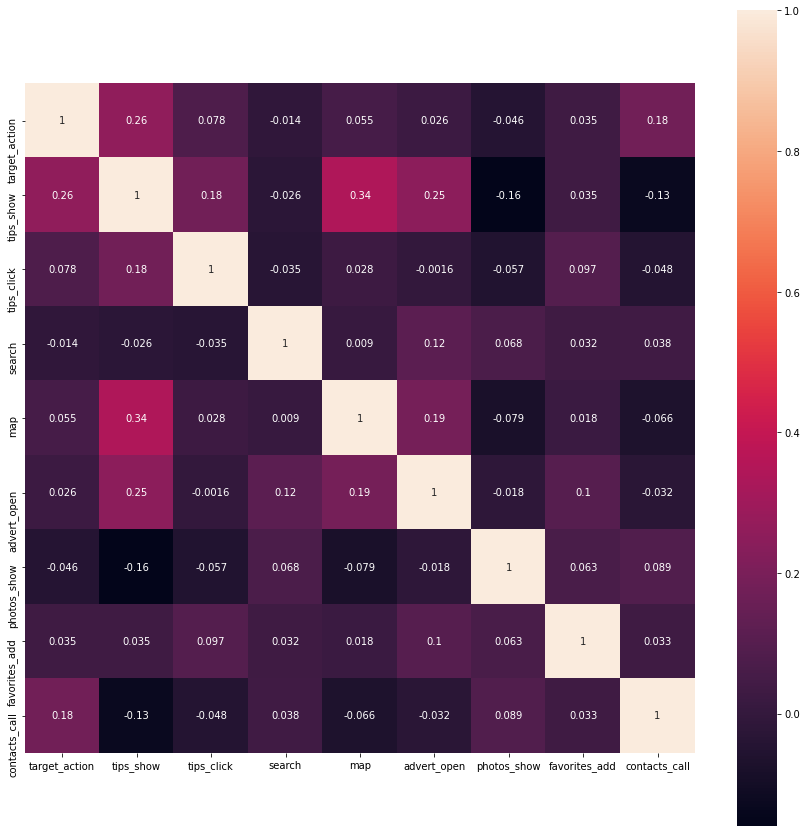

In [65]:
#визуализируем данные по корреляции действий пользователей

contacts_corr = data_grouped.corr()

# нарисуем heatmap

plt.figure(figsize = (15,15))
sns.heatmap(contacts_corr, square = True, annot = True)
#sns.set(rc = {'figure.figsize':(20,20)})
plt.show()

In [66]:
data_grouped.corr()

,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
target_action,1.000000,0.260483,0.077956,-0.013977,0.054874,0.025622,-0.045913,0.034651,0.179861
tips_show,0.260483,1.000000,0.178817,-0.026357,0.340956,0.250901,-0.159431,0.034829,-0.131476
tips_click,0.077956,0.178817,1.000000,-0.035347,0.028425,-0.001573,-0.056941,0.097209,-0.047907
search,-0.013977,-0.026357,-0.035347,1.000000,0.009006,0.115486,0.067999,0.031562,0.038219
map,0.054874,0.340956,0.028425,0.009006,1.000000,0.185052,-0.079248,0.017923,-0.066368
advert_open,0.025622,0.250901,-0.001573,0.115486,0.185052,1.000000,-0.017655,0.102906,-0.031631
photos_show,-0.045913,-0.159431,-0.056941,0.067999,-0.079248,-0.017655,1.000000,0.062808,0.088705
favorites_add,0.034651,0.034829,0.097209,0.031562,0.017923,0.102906,0.062808,1.000000,0.032673
contacts_call,0.179861,-0.131476,-0.047907,0.038219,-0.066368,-0.031631,0.088705,0.032673,1.000000


Видим, что наибольшая корреляция просмотра контактов наблюдается со следующими действиями пользователей:
    
1.tips_show - показ объявления

2.tips_click - клик по рекомендованному объявлению

3.map - открытие карты объявлений

*4.contacts_call - звонок по объявлению скорее является признаком, который зависит от просмотра контактов. Конечно, косвенно он также может взаимно влиять на просмотр следующих контактов, например, если после разговора с продавцом что-то заставило пользователя отказаться от покупки и возобновить поиски.

Однако здесь показана прямая зависимость для просмотра контактов. Так если мы пойдем выше по воронке, то при помощи тепловой карты увидим, что действие tips_show наиболее связано с просмотром карты объявлений и открытием рекламного объявления. **Поэтому данные действия пользователя также необходимо включить в анализ воронки событий**

In [67]:
#изучим данные по действиям пользователей в сессию (день) 

data_grouped.describe()

,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000
mean,1.829899,5.158788,0.134545,0.842020,0.444848,0.642020,1.546667,0.171313,0.218586
std,3.985188,10.336391,0.739845,2.108154,1.765705,3.053208,4.826553,0.898972,0.830099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,67.000000,124.000000,14.000000,51.000000,48.000000,62.000000,98.000000,16.000000,13.000000


In [68]:
print('Статистика по целевым пользователям, хотя бы раз совершившим целевое действие')
print()
print('Количество действий по просмотру контактов:', data_grouped['target_action'].sum())
print('Количество действий по просмотру объявлений (верхнеуровневому):',data_grouped['tips_show'].sum())
print('Количество действий по клику на объявление:', data_grouped['tips_click'].sum())
print('Количество действий по поиску в приложении:', data_grouped['search'].sum())
print('Количество действий по открытию карты объявлений:', data_grouped['map'].sum())
print('Количество действий по открытию объявления:', data_grouped['advert_open'].sum())
print('Количество действий по просмотру фото:', data_grouped['photos_show'].sum())
print('Количество действий по добавлению объявления в избранное:', data_grouped['favorites_add'].sum())
print('Количество действий по совершению звонка по объявлению:', data_grouped['contacts_call'].sum())

Статистика по целевым пользователям, хотя бы раз совершившим целевое действие

Количество действий по просмотру контактов: 4529
Количество действий по просмотру объявлений (верхнеуровневому): 12768
Количество действий по клику на объявление: 333
Количество действий по поиску в приложении: 2084
Количество действий по открытию карты объявлений: 1101
Количество действий по открытию объявления: 1589
Количество действий по просмотру фото: 3828
Количество действий по добавлению объявления в избранное: 424
Количество действий по совершению звонка по объявлению: 541


Таким образом, мы получили свод по активности среднестатистического целевого пользователя: наши пользователи в среднем за сессию (день) просматривают по два контакта, просматривая при этом 5 рекомендованных объявлений. Видим, что велико число просмотров контактов и рекомендованных объявлений в сравнении с остальными действиями. Это может говорить о том, что многие пользователи переходят к объявлению и контактам, минуя первоначальны интерфейс приложения с поиском (возможно, переходят по ссылке от друзей или с других внешних ресурсов).

### Анализ воронок событий

Исходя из данных анализа, сделанного выше, мы можем сделать вывод, что большое количество пользователей просматривает контакты, просто перейдя по внешней ссылке (например, получают ссылки на нужное объявление от друзей). Данная воронка, состоящая из одного действия, нас не будет интересовать, так как, во-первых, мы не можем напрямую на неё повлиять, и, во-вторых, ей предшествуют действия как раз того ключевого пользователя, который был вынужден пройти полный пользоватльский путь для поиска объявления. **Именно второй случай нас будет интересовать с точки зрения анализа пути клиента в приложении.**

Тогда сравним две воронки событий пользовательского пути по сессиям и наиболее часто встречающимся событиям.

#### Первый вариант: по дням и наиболее часто повторяющимся событиям

Для дальнейшего анализа сгруппируем данные по сессиям, действиям и времени. Далее для опеределения первого действия в сессии, которое чаще всего совершают пользователи, присоединим время начала сессии и узнаем, с какого шага начинался путь каждого пользователя (по сессиям).

In [69]:
sessions_grouped = session_test.groupby(['session_id','event_name']).agg({'event_time':'min', 'count': 'sum', }).sort_values(by = ['session_id', 'event_time'])
display(sessions_grouped)

event_time  count
session_id event_name                                     
1          search        2019-10-30 07:50:45.948358      6
           photos_show   2019-10-30 07:53:12.730053      6
           show_contacts 2019-10-30 08:01:05.420773      1
2          photos_show   2019-10-24 10:50:40.219833      8
           advert_open   2019-10-24 10:52:18.644065      1
...                                             ...    ...
4128       show_contacts 2019-11-02 18:17:41.386651      1
4129       tips_show     2019-10-16 18:39:40.968592      1
4130       tips_show     2019-10-17 20:09:19.443255      8
           show_contacts 2019-10-27 20:00:53.687128      2
4131       tips_show     2019-10-16 22:51:41.468371      3

[8018 rows x 2 columns]

In [70]:
sessions_earliest = session_test.groupby(['session_id']).agg({'event_time':'min'}).reset_index()
sessions_grouped_ind = sessions_grouped.reset_index()
sessions_earliest = sessions_earliest.rename(columns={'event_time': 'event_time_min'})
sessions_new = sessions_grouped_ind.merge(sessions_earliest).sort_values(by = ['session_id'])
sessions_new['diff'] = sessions_new['event_time'] - sessions_new['event_time_min']
display(sessions_new)


,session_id,event_name,event_time,count,event_time_min,diff
0,1,search,2019-10-30 07:50:45.948358,6,2019-10-30 07:50:45.948358,0 days 00:00:00
1,1,photos_show,2019-10-30 07:53:12.730053,6,2019-10-30 07:50:45.948358,0 days 00:02:26.781695
2,1,show_contacts,2019-10-30 08:01:05.420773,1,2019-10-30 07:50:45.948358,0 days 00:10:19.472415
3,2,photos_show,2019-10-24 10:50:40.219833,8,2019-10-24 10:50:40.219833,0 days 00:00:00
4,2,advert_open,2019-10-24 10:52:18.644065,1,2019-10-24 10:50:40.219833,0 days 00:01:38.424232
...,...,...,...,...,...,...
8012,4128,tips_show,2019-10-16 18:21:08.147694,1,2019-10-16 18:21:08.147694,0 days 00:00:00
8014,4129,tips_show,2019-10-16 18:39:40.968592,1,2019-10-16 18:39:40.968592,0 days 00:00:00
8016,4130,show_contacts,2019-10-27 20:00:53.687128,2,2019-10-17 20:09:19.443255,9 days 23:51:34.243873
8015,4130,tips_show,2019-10-17 20:09:19.443255,8,2019-10-17 20:09:19.443255,0 days 00:00:00


In [71]:
#выведем действия, с которых чаще всего начиналась сессия

first_actions = sessions_new.query('diff == "0 days 00:00:00"')
display(first_actions['event_name'].value_counts())

tips_show        1680
photos_show       634
show_contacts     619
search            616
map               355
advert_open       141
favorites_add      53
tips_click         33
Name: event_name, dtype: int64

Видим, что чаще всего сессии начинались с действия tips_show, а некоторые клиенты умудрялись сразу переходить к просмотру фото (возможно, также получали ссылки на фото от кого-то извне)

In [72]:
#проанализиуруем сессии,начинавшиеся с tips_show

first_actions_tips = first_actions.query('event_name == "tips_show"')
id_first_actions_tips = first_actions_tips['session_id']
#создадим датасет, в котором будет информация только по сессиям, которые начались с tips_show

funnel_first_1 = session_test[session_test['session_id'].isin(id_first_actions_tips)]

#target_data = data_full[data_full['user_id'].isin(target_users)]
display(funnel_first_1['event_name'].value_counts())

tips_show        8392
show_contacts    1410
advert_open       333
map               278
tips_click        177
search             99
favorites_add      45
photos_show         6
Name: event_name, dtype: int64

In [73]:
display(funnel_first_1.head())

,event_time,event_name,user_id,source,date,time,period,session_id,count
73834,2019-11-03 18:42:59.275533,tips_show,0103a07d-513f-42b9-8d91-d5891d5655fe,yandex,2019-11-03,18:42:59.275533,NaN,16,1
73835,2019-11-03 18:50:04.133976,show_contacts,0103a07d-513f-42b9-8d91-d5891d5655fe,yandex,2019-11-03,18:50:04.133976,424.0,16,1
62008,2019-10-27 16:52:54.870118,tips_show,035ae717-a6ae-4569-b952-16be9447832b,yandex,2019-10-27,16:52:54.870118,NaN,22,1
62009,2019-10-27 16:58:12.318501,show_contacts,035ae717-a6ae-4569-b952-16be9447832b,yandex,2019-10-27,16:58:12.318501,317.0,22,1
62010,2019-10-27 16:59:59.584416,tips_show,035ae717-a6ae-4569-b952-16be9447832b,yandex,2019-10-27,16:59:59.584416,107.0,22,1


Таким образом, можем предположить, что много сессий целевых пользователей состояли из двух действий - tips_show и show_contacts. Однако для выявления мест для улучшения платформы, нам нужен более подробный анализ, состоящий хотя бы из трех шагов. Поэтому ниже мы проанализируем 2 воронки на основании данных по сессиям:<br>

**Первая воронка:** <br>
1.tips_show <br>
2.advert_open <br>
3.show_contacts <br>

**Вторая воронка:** <br>
1.search <br>
2.tips_show <br>
3.show_contacts <br>


In [74]:
#выведем последовательность для первой воронки

#второй этап

funnel_first_2_list = funnel_first_1.query('event_name == "advert_open"')
id_first_actions_2 = funnel_first_2_list['session_id']
funnel_first_2 = funnel_first_1[session_test['session_id'].isin(id_first_actions_2)]

#третий этап
funnel_first_3_list = funnel_first_2.query('event_name == "show_contacts"')
id_first_actions_3 = funnel_first_3_list['session_id']
funnel_first_3 = funnel_first_2[session_test['session_id'].isin(id_first_actions_3)]


print('Количество сессий на первом этапе:', funnel_first_1['session_id'].nunique())
print('Количество сессий на втором этапе:', funnel_first_2['session_id'].nunique())
print('Количество сессий на третьем этапе:', funnel_first_3['session_id'].nunique())
print('Конверсия в просмотры по первой воронке:', round(funnel_first_3['session_id'].nunique()/funnel_first_1['session_id'].nunique(),2))

Количество сессий на первом этапе: 1680
Количество сессий на втором этапе: 85
Количество сессий на третьем этапе: 26
Конверсия в просмотры по первой воронке: 0.02


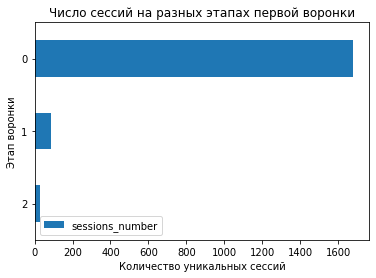

In [122]:
#добавим визуализацию

funnel_first_vzl = [['Первый этап', funnel_first_1['session_id'].nunique()],
                   ['Второй этап', funnel_first_2['session_id'].nunique()],
                   ['Третий этап', funnel_first_3['session_id'].nunique()]]

funnel_first_vzl = pd.DataFrame(funnel_first_vzl)
funnel_first_vzl = funnel_first_vzl.rename(columns = {0: 'step', 1: 'sessions_number'})
funnel_first_vzl.sort_values(by = ['sessions_number']).plot(kind = 'barh', title = 'Число сессий на разных этапах первой воронки')
plt.xlabel('Количество уникальных сессий')
plt.ylabel('Этап воронки')
plt.show()

In [75]:
#выведем последовательность для второй воронки

#проанализиуруем сессии,начинавшиеся с tips_show

first_actions_search = first_actions.query('event_name == "search"')
id_first_actions_search = first_actions_search['session_id']
#создадим датасет, в котором будет информация только по сессиям, которые начались с tips_show

funnel_second_1 = session_test[session_test['session_id'].isin(id_first_actions_search)]

#второй этап

funnel_second_2_list = funnel_second_1.query('event_name == "tips_show"')
id_second_actions_2 = funnel_second_2_list['session_id']
funnel_second_2 = funnel_second_1[session_test['session_id'].isin(id_second_actions_2)]

#третий этап
funnel_second_3_list = funnel_second_2.query('event_name == "show_contacts"')
id_second_actions_3 = funnel_second_3_list['session_id']
funnel_second_3 = funnel_second_2[session_test['session_id'].isin(id_second_actions_3)]


print('Количество сессий на первом этапе:', funnel_second_1['session_id'].nunique())
print('Количество сессий на втором этапе:', funnel_second_2['session_id'].nunique())
print('Количество сессий на третьем этапе:', funnel_second_3['session_id'].nunique())
print('Конверсия в просмотры по первой воронке:', round(funnel_second_3['session_id'].nunique()/funnel_second_1['session_id'].nunique(),2))

Количество сессий на первом этапе: 616
Количество сессий на втором этапе: 151
Количество сессий на третьем этапе: 73
Конверсия в просмотры по первой воронке: 0.12


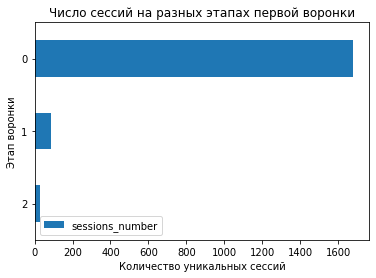

In [123]:
#добавим визуализацию

funnel_second_vzl = [['Первый этап', funnel_second_1['session_id'].nunique()],
                   ['Второй этап', funnel_second_2['session_id'].nunique()],
                   ['Третий этап', funnel_second_3['session_id'].nunique()]]

funnel_second_vzl = pd.DataFrame(funnel_first_vzl)
funnel_second_vzl = funnel_second_vzl.rename(columns = {0: 'step', 1: 'sessions_number'})
funnel_second_vzl.sort_values(by = ['sessions_number']).plot(kind = 'barh', title = 'Число сессий на разных этапах первой воронки')
plt.xlabel('Количество уникальных сессий')
plt.ylabel('Этап воронки')
plt.show()

**Промежуточный вывод:** таким образом, видим, что конверсия в просмотры по сессиям по второй воронке на целых 10 п.п. превышает конверсию по первой воронке. Также важно отметить, что путь пользователей по многим сессиям довольно короткий и может состоять только из шагов tips_show и show_contacts.  

#### Второй вариант: по дням и наиболее часто повторяющимся событиям

Исходя из данных анализа, сделанного выше, мы можем сделать вывод, что большое количество пользователей просматривает контакты, просто перейдя по внешней ссылке (например, получают ссылки на нужное объявление от друзей). Данная воронка, состоящая из одного действия, нас не будет интересовать, так как, во-первых, мы не можем напрямую на неё повлиять, и, во-вторых, ей предшествуют действия как раз того ключевого пользователя, который был вынужден пройти полный пользоватльский путь для поиска объявления. **Именно второй случай нас будет интересовать с точки зрения анализа пути клиента в приложении.**

Из прошлых разделов мы узнали, что наиболее связанными с целевым событием являются действия по просмотру выплывающего объявления и клик на него. Эти же события связаны с переходом клиента на карту объявления или нажатием на рекламный баннер.

Тогда сравним две воронки событий пользовательского пути: <br>

В **первой воронке** представим, что наш пользователь прошел следующий путь: <br>
1.начал поиск по сайту <br>
2.открыл карту объявлений <br>
3.увидел рекомендованное объявление <br>
4.посмотрел контакты. <br>


Пусть путь пользователя по **второй воронке** выглядит следующим образом: <br>
1.пользователь поиск по сайту <br>
2.увидел рекламное объявление <br>
3.увидел рекомендованное объявление <br>
4.просмотрел контакты <br>

In [76]:
#напомним исходное количество целевых пользователей

print(data_grouped['user_id'].nunique())

981


In [105]:
#проанализируем воронку по первому сценарию

first_funnel = data_grouped.query('search >= 1')
first_funnel_2 = first_funnel.query('map >= 1')
first_funnel_3 = first_funnel_2.query('tips_show >= 1')
first_funnel_4 = first_funnel_3.query('target_action >= 1')

print('Количество пользователей на первом этапе:', first_funnel['user_id'].nunique())
print('Количество пользователей на втором этапе:', first_funnel_2['user_id'].nunique())
print('Количество пользователей на третьем этапе:', first_funnel_3['user_id'].nunique())
print('Количество пользователей на четвертом этапе:', first_funnel_4['user_id'].nunique())
print('Конверсия в просмотры по первой воронке:', round(first_funnel_4['user_id'].nunique()/first_funnel['user_id'].nunique(),2))

Количество пользователей на первом этапе: 377
Количество пользователей на втором этапе: 82
Количество пользователей на третьем этапе: 78
Количество пользователей на четвертом этапе: 61
Конверсия в просмотры по первой воронке: 0.16


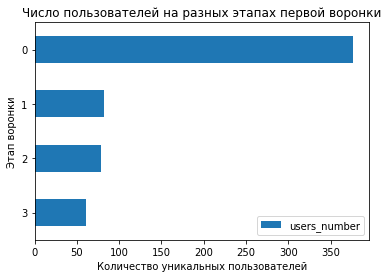

In [119]:
#добавим визуализацию

first_funnel_vzl = [['Первый этап', first_funnel['user_id'].nunique()],
                   ['Второй этап', first_funnel_2['user_id'].nunique()],
                   ['Третий этап', first_funnel_3['user_id'].nunique()],
                   ['Четвертый этап', first_funnel_4['user_id'].nunique()]]

first_funnel_vzl = pd.DataFrame(first_funnel_vzl)
first_funnel_vzl = first_funnel_vzl.rename(columns = {0: 'step', 1: 'users_number'})
first_funnel_vzl.sort_values(by = ['users_number']).plot(kind = 'barh', title = 'Число пользователей на разных этапах первой воронки')
plt.xlabel('Количество уникальных пользователей')
plt.ylabel('Этап воронки')
plt.show()

In [78]:
#проанализируем воронку по второму сценарию

second_funnel = data_grouped.query('search >= 1')
second_funnel_2 = second_funnel.query('advert_open >= 1')
second_funnel_3 = second_funnel_2.query('tips_show >= 1')
second_funnel_4 = second_funnel_3.query('target_action >= 1')

print('Количество пользователей на первом этапе:', second_funnel['user_id'].nunique())
print('Количество пользователей на втором этапе:', second_funnel_2['user_id'].nunique())
print('Количество пользователей на третьем этапе:', second_funnel_3['user_id'].nunique())
print('Количество пользователей на четвертом этапе:', second_funnel_4['user_id'].nunique())
print('Конверсия в просмотры по второй воронке:', round(second_funnel_4['user_id'].nunique()/second_funnel['user_id'].nunique(),2))

Количество пользователей на первом этапе: 377
Количество пользователей на втором этапе: 67
Количество пользователей на третьем этапе: 46
Количество пользователей на четвертом этапе: 42
Конверсия в просмотры по второй воронке: 0.11


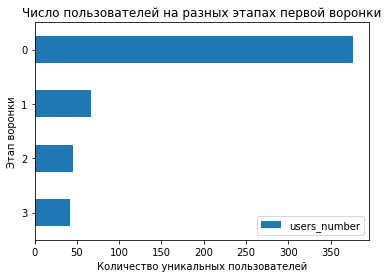

In [120]:
#добавим визуализацию

second_funnel_vzl = [['Первый этап', second_funnel['user_id'].nunique()],
                   ['Второй этап', second_funnel_2['user_id'].nunique()],
                   ['Третий этап', second_funnel_3['user_id'].nunique()],
                   ['Четвертый этап', second_funnel_4['user_id'].nunique()]]

second_funnel_vzl = pd.DataFrame(second_funnel_vzl)
second_funnel_vzl = second_funnel_vzl.rename(columns = {0: 'step', 1: 'users_number'})
second_funnel_vzl.sort_values(by = ['users_number']).plot(kind = 'barh', title = 'Число пользователей на разных этапах первой воронки')
plt.xlabel('Количество уникальных пользователей')
plt.ylabel('Этап воронки')
plt.show()

Видим, что конверсия по первой воронке выше, чем по второй: соответственно можем сделать предварительный вывод, что карты объявлений работает эффективнее, чем рекламный показ рекомендованного объявления. С одной стороны, это можно объяснить тем, что начиная поиск с карты, пользователь целенаправленно выбирает нужные ему объявления, а на рекомендованные может кликнуть чисто из любопытства. **В качестве рекомендации** здесь можно посоветовать еще раз просмотреть алгоритмы, в соответствии с которыми пользователю показывается рекомендованное объявление.  

In [79]:
first_funnel_4.corr()

,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
target_action,1.000000,0.303573,-0.029633,-0.008601,0.022311,0.182563,-0.077107,0.114438,NaN
tips_show,0.303573,1.000000,0.073513,0.461093,0.281006,0.505855,-0.134830,0.303161,NaN
tips_click,-0.029633,0.073513,1.000000,-0.087383,-0.121319,-0.117284,-0.034220,-0.067716,NaN
search,-0.008601,0.461093,-0.087383,1.000000,0.282106,0.246061,-0.048897,0.141916,NaN
map,0.022311,0.281006,-0.121319,0.282106,1.000000,0.200494,0.215736,0.095243,NaN
advert_open,0.182563,0.505855,-0.117284,0.246061,0.200494,1.000000,-0.043718,0.039355,NaN
photos_show,-0.077107,-0.134830,-0.034220,-0.048897,0.215736,-0.043718,1.000000,-0.027108,NaN
favorites_add,0.114438,0.303161,-0.067716,0.141916,0.095243,0.039355,-0.027108,1.000000,NaN
contacts_call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Промежуточный вывод:** итого мы видим, что целевые пользователи, которые осуществляли поиск на сайте самостоятельно, чаще всего совершали действие tips_show — увидел рекомендованные объявления, а данное действие,как правило, вытекало из действий map — открыл карту объявлений или advert_open — открыл карточки объявления. Поэтому воронка по основным пользователям должна включать эти действия.

Видим, что конверсия по первой воронке выше, чем по второй: соответственно можем сделать предварительный вывод, что карты объявлений работает эффективнее, чем рекламный показ рекомендованного объявления. С одной стороны, это можно объяснить тем, что начиная поиск с карты, пользователь целенаправленно выбирает нужные ему объявления, а на рекомендованные может кликнуть чисто из любопытства. **В качестве рекомендации** здесь можно посоветовать еще раз просмотреть алгоритмы, в соответствии с которыми пользователю показывается рекомендованное объявление. Конверсия в просмотры в перовм случае составила - 16%, во втором - 11%. 

## Проверка статистических гипотез

В ТЗ заказчик поставил задачу по проверке статистических гипотез. 

**Первая гипотеза:** Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Гипотеза: конверсия в просмотры контактов незначимо различается у этих двух групп.

Альтернативная гипотеза: конверсия в просмотры контактов значимо различается у этих двух групп.

In [80]:
#составим две выборки

#в первой выборке пользователи, которые совершают действия tips_show и tips_click
group_one = data_grouped.query('tips_show >= 1 and tips_click >=1')

#во второй выборке пользователи, которые совершают только действия tips_show
group_two = data_grouped.query('tips_show >= 1 and tips_click == 0')

In [81]:
group_one.describe()

,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.0
mean,3.392000,16.552000,2.160000,0.512000,1.048000,0.472000,0.064000,0.240000,0.0
std,5.672367,12.651314,1.738557,1.168236,4.417443,1.945118,0.435223,1.159811,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,4.000000,23.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,49.000000,75.000000,12.000000,5.000000,48.000000,13.000000,4.000000,9.000000,0.0


In [82]:
group_two.describe()

,target_action,tips_show,tips_click,search,map,advert_open,photos_show,favorites_add,contacts_call
count,1095.000000,1095.000000,1095.0,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.0
mean,2.140639,9.770776,0.0,0.521461,0.836530,1.044749,0.008219,0.098630,0.0
std,4.735059,12.522793,0.0,1.371306,2.094159,4.147730,0.193415,0.653599,0.0
min,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,12.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,67.000000,124.000000,0.0,14.000000,33.000000,62.000000,5.000000,10.000000,0.0


Видим, что по объему выборки различны: пользователей, совершающих оба действия, практически в 9 раз меньше. Поэтому будем это учитывать в анализе ниже, добавив в анализ параметр difference (= p1 - p2), определяющий разницу пропорций в датасетах

In [83]:
#выведем переменные для анализа статистической гипотезы 1

activity_one = (group_one['tips_show'].sum() + group_one['tips_click'].sum() + group_one['search'].sum() + group_one['map'].sum() + group_one['advert_open'].sum() + group_one['photos_show'].sum() + group_one['favorites_add'].sum())
contacts_one = len(group_one.query('target_action >= 1'))

activity_two = (group_two['tips_show'].sum() + group_two['tips_click'].sum() + group_two['search'].sum() + group_two['map'].sum() + group_two['advert_open'].sum() + group_two['photos_show'].sum() + group_two['favorites_add'].sum())
contacts_two = len(group_two.query('target_action >= 1'))

In [84]:
print('Число действий в первой группе:', activity_one)
print('Число просмотров в первой группе:', contacts_one)
print('Число действий в второй группе:', activity_two)
print('Число просмотров в второй группе:', contacts_two)

Число действий в первой группе: 2631
Число просмотров в первой группе: 89
Число действий в второй группе: 13447
Число просмотров в второй группе: 653


In [85]:
# создаем функцию определения статистической значимости различий в двух выборках

def conv_check(successes, trials):
    alpha = 0.05 # определяем критический уровень стат значимости
    p1 = successes[0] / trials[0] # считаем пропорцию успехов в первой группе
    p2 = successes[1] / trials[1] # считаем пропорцию успехов во второй группе
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1]) # считаем пропорцию успехов в комбинированном датасете
    difference = p1 - p2 # определяем разницу пропорций в выборках
    z_value = difference / mt.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])) # считаем статистику
                                                                                                    # в стандартных отклонениях
                                                                                                    # стандартного нормального
                                                                                                    # распределения
    distr = st.norm(0, 1) # задаем стандартное нормальное распределение
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    if (p_value < alpha):
        print('Отвергаем нулевыую гипотезу: между группами есть значимая разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными.')
       
    return p_value   

In [86]:
#проведем анализ статистической гипотезы

actions_total = np.array([activity_one, activity_two])
contacts_total = np.array([contacts_one, contacts_two])

print(conv_check(contacts_total, actions_total))

Отвергаем нулевыую гипотезу: между группами есть значимая разница.
0.0009873069364119136


**Промежуточный вывод:** таким образом, мы отвергаем нулевую гипотезу и подтверждаем, что конверсия в просмотры у двух групп различна.

Для планирования рекламного бюджета важно понимать, в какие источники привлечения пользователей лучше вкладываться. Нашими основными источниками являются Yandex и Google, поэтому интересно проверить, различается ли конверсия в просмотры между этими двумя группами.

**Вторая гипотеза:** просмотр контактов группы пользователей, пришедших из Yandex, незначимо отличается от пользователей, пришедших из Google

Альтернативная гипотеза: просмотр контактов группы пользователей, пришедших из Yandex, незначимо отличается от пользователей, пришедших из Google

In [87]:
#добавим к нашему датасету с сессиями данные по источнику

sources_data = sources_data.rename(columns={'userId': 'user_id'})
users_by_sources = data_grouped.merge(sources_data)

#разделим датасет на две группы
users_yandex = users_by_sources.query('source == "yandex"')
users_google = users_by_sources.query('source == "google"')

#выведем переменные для анализа статистической гипотезы 2

activity_yandex = (users_yandex['tips_show'].sum() + users_yandex['tips_click'].sum() + users_yandex['search'].sum() + users_yandex['map'].sum() + users_yandex['advert_open'].sum() + users_yandex['photos_show'].sum() + users_yandex['favorites_add'].sum())
contacts_yandex = len(users_yandex.query('target_action >= 1'))

activity_google = (users_google['tips_show'].sum() + users_google['tips_click'].sum() + users_google['search'].sum() + users_google['map'].sum() + users_google['advert_open'].sum() + users_google['photos_show'].sum() + users_google['favorites_add'].sum())
contacts_google = len(users_google.query('target_action >= 1'))

In [88]:
print('Число действий в группе пользователей Yandex:', activity_yandex)
print('Число просмотров в группе пользователей Yandex:', contacts_yandex)
print('Число действий в группе пользователей Google:', activity_google)
print('Число просмотров в группе пользователей Yandex:', contacts_google)

Число действий в группе пользователей Yandex: 10238
Число просмотров в группе пользователей Yandex: 657
Число действий в группе пользователей Google: 6910
Число просмотров в группе пользователей Yandex: 433


In [89]:
#проведем анализ статистической гипотезы

actions_by_sources = np.array([activity_yandex, activity_google])
contacts_by_sources = np.array([contacts_yandex, contacts_google])

print(conv_check(contacts_by_sources, actions_by_sources))

Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными.
0.6909985483111853


**Промежуточный вывод:** таким образом, проверка статистической гипотезы показала, что источник привлечения значимо не влияет на долю просмотров, то есть, все наши пользователи одинаково важны, вне зависимости от источника :)

## Общие выводы

**Ключевые выводы:** <br>

1.Всего за анлизируемые период приложение "Ненужные вещи" посетило 4293 пользователя, 981 из которых совершил целевое действие, которое мы считаем индикатором эффективности использования приложения - просмотр контактов. Всего мы имеем три вида источников привлечения пользователей: yandex (45% пользователей), google (26%) и другие (29%). <br>

2.В целом за рассматриваемый период по приложению наблюдается **положительная динамика**: аудитория растет, причем, как в целом, так и по числу целевых пользователей, которые хотя бы раз совершили целевое действие - просмотр контактов. Темпы роста числа целевых пользователей выше, чем по всей выборке. <br>

3.При сравнении пользователей из целевой выборки, который хотя бы раз просмотрели контакты, и выборкой пользователей, ни разу этого не сделавших, можно отметить **следующие отличия**: <br>

А.Нецелевые пользователи гораздо чаще открывают карту объявлений (действие map) - в среднем, на 16% чаще <br>

Б.Целевые пользователи вдвое чаще добавляют объявление в избранное и в полтора раза чаще просматривают фотографии и кликают по рекомендованному объявлению <br>

В.Целевые пользователи реже открывают рекламную карточку объявления (advert_open) <br>

4.Анализ выявил, что пользователи в среднем за сессию (день) просматривают по два контакта, просматривая при этом 5 рекомендованных объявлений. Число просмотров контактов и рекомендованных объявлений выше по сравнению с остальными действиями. Это может говорить о том, что **многие пользователи переходят к объявлению и контактам, минуя первоначальны интерфейс приложения с поиском (возможно, переходят по ссылке от друзей или с других внешних ресурсов)**.
<br>

5.Целевые пользователи, которые осуществляли поиск на сайте самостоятельно, чаще всего совершали действие tips_show — увидел рекомендованные объявления, а данное действие,как правило, вытекало из действий map — открыл карту объявлений или advert_open — открыл карточки объявления. Поэтому воронка по основным пользователям должна включать эти действия. <br>

Проведенный анализ показал, что карта объявлений работает эффективнее, чем рекламный показ рекомендованного объявления. С одной стороны, это можно объяснить тем, что начиная поиск с карты, пользователь целенаправленно выбирает нужные ему объявления, а на рекомендованные может кликнуть чисто из любопытства. **В качестве рекомендации** здесь можно посоветовать еще раз просмотреть алгоритмы, в соответствии с которыми пользователю показывается рекомендованное объявление. Конверсия в просмотры в перовм случае составила - 16%, во втором - 11%. <br>

Конверсия в просмотры по сессиям по второй воронке на целых 10 п.п. превышает конверсию по первой воронке. Также важно отметить, что путь пользователей по многим сессиям довольно короткий и может состоять только из шагов tips_show и show_contacts. <br>

6.Проверка статистических гипотез позволила нам сделать несколько выводов:

А.Конверсия в просмотры у групп, совершающих действия и tips_show, и tips_click значимо отличается от конверсии группы, которая совершают только tips_show. 

Б.Исследование показало отсутствие значимой связи между источником и совершением целевого действия.Однако следует отметить, что доля пользователей из Google в целевой выборке немного выше, чем в среднем по всему датасету.
